<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-11-to-15/blob/main/Textmining(Amazonproducts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [10]:
path = r"/content/amazon_com-product_reviews__20200101_20200331_sample (1).csv"
patha = r"/content/positive-words.txt"
pathb = r"/content/negative-words.txt"
pathc = r"/content/stop.txt"


In [11]:
data = pd.read_csv(path)

In [12]:
with open(patha) as f:
    positive_words = f.read().splitlines()

with open(pathb) as f:
    negative_words = f.read().splitlines()

with open(pathc) as f:
    stop_words = f.read().splitlines()

In [13]:
def preprocess_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(cleaned_text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [14]:
def analyze_emotion(tokens):
    emotion_counter = Counter()
    for token in tokens:
        if token in positive_words:
            emotion_counter['Positive'] += 1
        elif token in negative_words:
            emotion_counter['Negative'] += 1
    return emotion_counter

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
data['Processed Review'] = data['Review'].apply(preprocess_text)
data['Emotion'] = data['Processed Review'].apply(analyze_emotion)

In [19]:
emotion_counts = data['Emotion'].sum()
emotion_counts = dict(emotion_counts)

In [20]:
emotions = list(emotion_counts.keys())
count_values = list(emotion_counts.values())

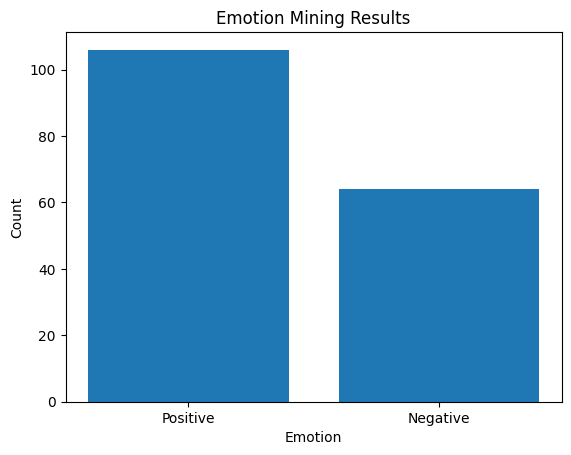

In [21]:
plt.bar(emotions, count_values)
plt.title('Emotion Mining Results')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()